In [1]:
import pickle as pkl
import pk_plot_library as pplib

pplib.imports()

In [2]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/2-10_pkdatasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', right = True, top = True, labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.04, 20])
ds.axisLabelArgs('both', fontsize = 16)

ds.displayAs('simname', ['tng100', 'tng300', 'tng100-2', 'tng100-3'], ['TNG100-1', 'TNG300-1', 'TNG100-2', 'TNG100-3'])
ds.setColors('simname', ['#472d30', 'pink', 'green', 'teal'], ['tng100', 'tng100-2', 'tng100-3', 'tng300'])
ds.setOrder('simname', ['tng100', 'tng100-2', 'tng100-3', 'tng300'])
ds.displayAs('HI_fieldname', ['vn', 'hiptl', 'hisubhalo'], ['All Particles', 'Particles in Galaxies', 'Galaxy Centers'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('color', ['blue', 'red', 'resolved'], ['Blue Galaxies', 'Red Galaxies', 'All Galaxies'])

ds.setXLabel(pplib.wnum())
def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return

# Investigations

## HI Auto Powers

The row values for space: ['real', 'redshift']
The column values for HI_fieldname: ['vn', 'hiptl', 'hisubhalo']


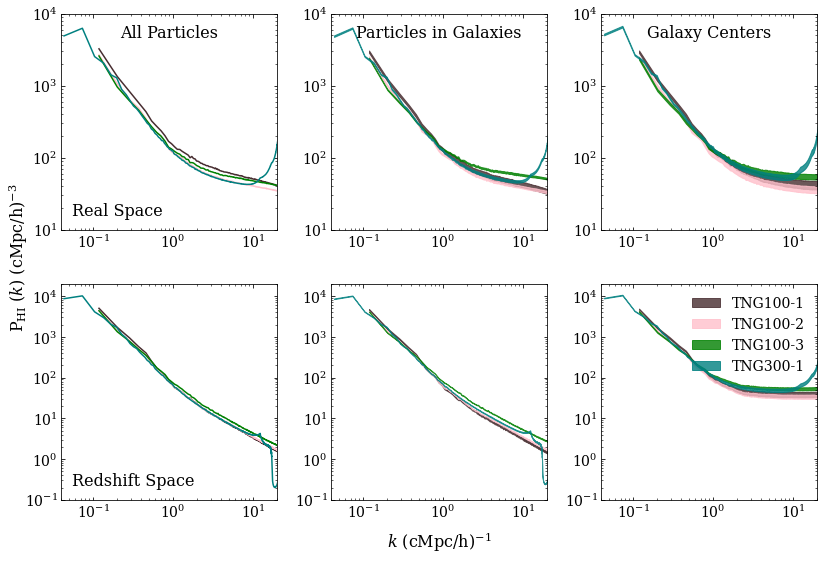

In [3]:
ip = {'is_auto':True, 'HI_fieldname':['vn', 'hiptl', 'hisubhalo'], 'simname':['tng100', 'tng300', 'tng100-2', 'tng100-3'],
     'snapshot':99, 'space':['real', 'redshift'], 'grid_resolution':800, 'path':['fiducial', 'low-2', 'low-3']}
fg = ds.figrid('simname', 'space', 'HI_fieldname', ip)
fg.autoFill(alpha = 0.8)
fg.setYLabel(pplib.pklab('HI'))
fg.axisArgs(ylim = (10, 1e4), slc = 'real')
fg.axisArgs(ylim = (.1, 2e4), slc = 'redshift')
fg.plot()

* <span style="color:red"> Not sure why the tng300-1 auto powers have that knee at the largest scale, that's pretty concerning </span>
* When looking strictly at the HI within galaxies, the match between the simulations is extremely good. TNG100-1 differs from the other two simulations though when using all particles - probably due to the filaments being more sensitive to the mass resolution definition? In any case, the difference is still small.
* The fact that TNG100-2 and TNG300-1 overlap a lot is a good sign that what we're looking at is mostly due to mass resolution.

## Galaxy Auto Powers

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red', 'resolved']


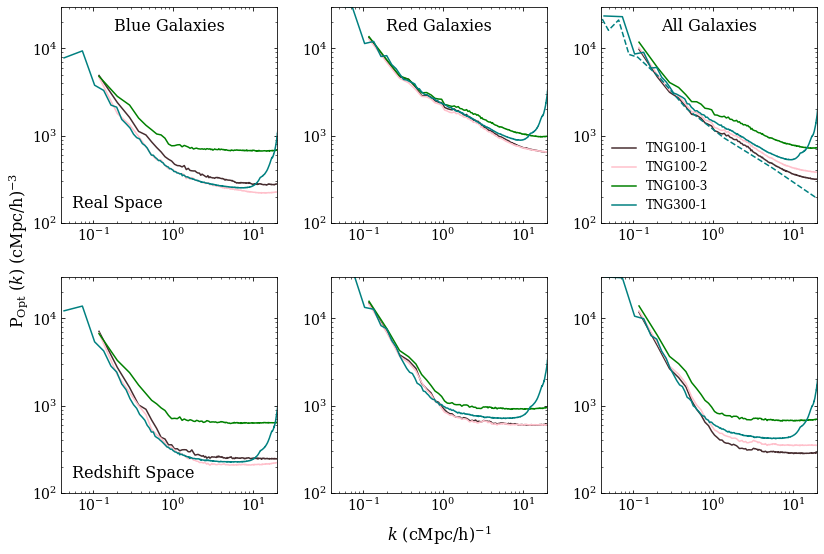

In [4]:
ip = {'is_auto':True, 'fieldname':'galaxy', 'simname':['tng100', 'tng300', 'tng100-2', 'tng100-3'],
     'snapshot':99, 'space':['real', 'redshift'], 'grid_resolution':800, 'path':['fiducial', 'low-2', 'low-3'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved']}
fg = ds.figrid('simname', 'space', 'color', ip)
fg.setYLabel(pplib.pklab("Opt"))
fg.legendArgs(slc = (0, 2), loc = 'lower left', fontsize = 12)
fg.axisArgs(ylim = (1e2, 3e4))
fg.plot()


import numpy as np
springel = np.genfromtxt('/Users/cosinga/code/hcolor/fig_md_analysis/stars_tng300.csv', delimiter = ',')

ax = fg.axes[0, 2]
ax.plot(springel[:, 0], springel[:, 1], color = 'teal', linestyle = 'dashed', label = 'Springel+18')

* Again, there's the weird knee at the largest scales of the box in all of the auto power spectra
* Similar otherwise to the HI comparison between the simulations with blue galaxies
* Red galaxies match extremely well across the board
* The all galaxies is probably affected due to the changing proportions of blue vs red

## Cross-Powers

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red', 'resolved']


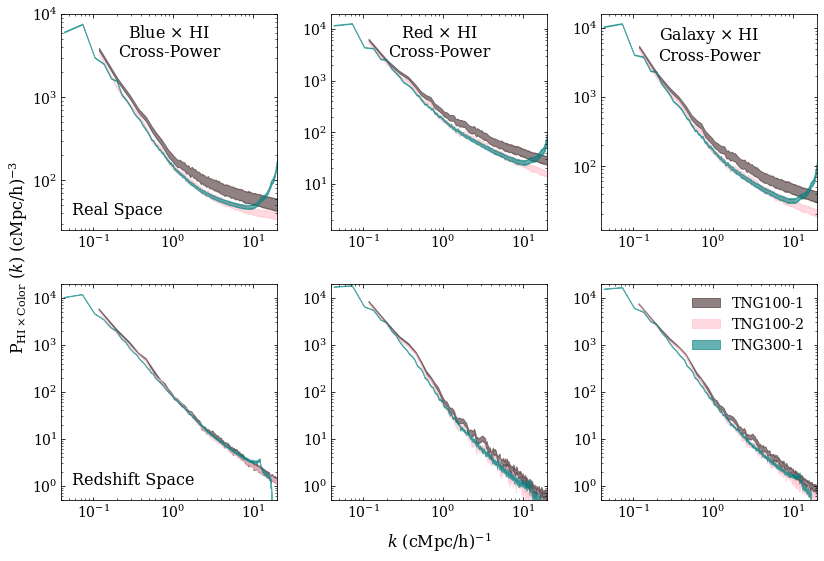

In [5]:
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue $\\times$ HI\nCross-Power', 'Red $\\times$ HI\nCross-Power', 'Galaxy $\\times$ HI\nCross-Power'])
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'simname':['tng100', 'tng100-2', 'tng300'], 
      'path':['fiducial', 'low-2'], 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':['real', 'redshift'],
     'snapshot':99}
fg = ds.figrid('simname', 'space', 'color', ip)
fg.autoFill(alpha = 0.6)
fg.setYLabel(pplib.pklab('HI', 'Color'))
fg.axisArgs(ylim = (.5, 2e4), slc = 'redshift')
fg.plot()

# Paper Figures

The row values for color: ['blue', 'red']
The column values for snapshot: [99]


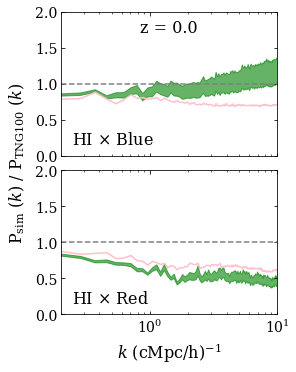

In [6]:
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['HI $\\times$ Blue', 'HI $\\times$ Red', 'Galaxy $\\times$ HI'])
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'simname':['tng100', 'tng100-2', 'tng100-3'], 
      'path':['fiducial', 'low-2', 'low-3'], 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red'], 'space':'real',
     'snapshot':99}
fg = ds.figrid('simname', 'color', 'snapshot', ip)
fg.autoNorm({'simname':'tng100'}, ['model'])
fg.gspecArgs(yborder = [0, 0.35])
fg.autoFill()
fg.setFunc({'figrid_process':'fill', 'simname':'tng100-2'}, fill_mean)
fg.setPanelsize(3, 2)
fg.colLabels(['z = 0.0'])
fg.gspecArgs(hspace = 0.1)
fg.axisArgs(yscale = 'linear', ylim = (0,2), xlim = (0.2, 10))
fg.setYLabel(pplib.pkrat('sim','TNG100'))
fg.setDefaultTicksParams()
fg.legendArgs(rm_legend = True)
fg.plotOnes()
fg.plot()
# fg.save('/Users/cosinga/code/hicolor_draft_two/figures/sim_tests.pdf', dpi = 150)
# fg.save('sim_tests.png', dpi = 150)

In [7]:
# interpolate the TNG300-1 plot
ip['simname'] = 'tng100'
ip['color'] = 'blue'
mylist = ds.getMatching(ip)
wvnms = mylist[0].getData()[0]
# print(wvnms)

pks = np.zeros((len(mylist), len(wvnms)))
for i, pk in enumerate(mylist):
    pks[i, :] = pk.getData()[1]
blue_mean = np.mean(pks, axis = 0)

ip['color'] = 'red'
mylist = ds.getMatching(ip)
wvnms = mylist[0].getData()[0]
# print(wvnms)

pks = np.zeros((len(mylist), len(wvnms)))
for i, pk in enumerate(mylist):
    pks[i, :] = pk.getData()[1]
red_mean = np.mean(pks, axis = 0)


In [8]:
ip['simname'] = 'tng300'
ip['color'] = 'blue'
mylist = ds.getMatching(ip)
lgwvnms = mylist[0].getData()[0]
# print(wvnms)

pks = np.zeros((len(mylist), len(wvnms)))
for i, pk in enumerate(mylist):
    pks[i, :] = pk.getData()[1]
lblue_mean = np.mean(pks, axis = 0)

ip['color'] = 'red'
mylist = ds.getMatching(ip)
lgwvnms = mylist[0].getData()[0]
# print(wvnms)

pks = np.zeros((len(mylist), len(wvnms)))
for i, pk in enumerate(mylist):
    pks[i, :] = pk.getData()[1]
lred_mean = np.mean(pks, axis = 0)



In [9]:
limits = [.02, 10]
mask = (wvnms < limits[1]) & (lgwvnms > limits[0])
blue_interp = np.interp(np.log10(wvnms[mask]), np.log10(lgwvnms), np.log10(lblue_mean))
red_interp = np.interp(np.log10(wvnms[mask]), np.log10(lgwvnms), np.log10(lred_mean))


/var/folders/79/98r4p1nd3v19cl5z3dbndg_c0000gn/T/ipykernel_16024/3027870405.py:4: RuntimeWarning: invalid value encountered in log10
  red_interp = np.interp(np.log10(wvnms[mask]), np.log10(lgwvnms), np.log10(lred_mean))


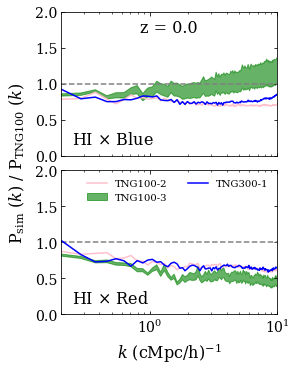

In [10]:
fg.axes[0, 0].plot(wvnms[mask], (10**blue_interp)/blue_mean[mask], color = 'blue')
fg.axes[1, 0].plot(wvnms[mask], (10**red_interp)/red_mean[mask], label = 'TNG300-1', color = 'blue')
fg.axes[1, 0].legend(loc = 'upper right', frameon = False, ncol = 2, fontsize = 10)
fg.fig


In [11]:
fg.fig.savefig('/Users/cosinga/code/hicolor_draft_two/figures/sim_volume.pdf', dpi = 150, bbox_inches = 'tight')